# CMPT 423/820
## Assignment 4 Question 2
* Your Name
* Your student number
* Your NSID

### Importing common libraries

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing other libraries 
We'll import the SVM library, and the library that lets us work with artificial and built-in datasets.

In [3]:
from sklearn import svm
from sklearn import datasets

### A function to visualize how a classifier works on given data
The function below is basically MatPlotLib magic to make nice visualizations of the SVM classifier for simple 2D data.  It fits the given classifier, and retrieves the support vectors from it afterward.  AS a result, it's specialized to 2D SVM models.

The separating hyperplane is a solid line, and the two margins are visualized as dashed lines.  The support vectors, i.e., the data points that contribute towards the location of the separating hyperplane, are visualized as circled points.  Data that are not circled do not affect the location of the hyperplane.

You can call this function without having to understand everything it's doing. 

In [4]:
def plot_hyperplane(svm_clf, X, y):
    """ Plot the separating hyperplane determined by svm_clf on data X with classes y.
        The classifier svm_clf is assumed not to have been fitted to the data already.
        Data is assumed to be 2D, with exactly 2 class labels.
    """
    # first do the fitting
    svm_clf.fit(X, y)
    
    # plot the data values X
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

### Generate some synthetic data
We can generate some synthetic data using some built in tools provided by scikit in the library ```sklearn.datasets```.  
* ```make_blobs()``` creates separable clusters in 2D.
* ```make_circles()``` creates a blob with a circle around it.
* ```make_moons()``` creates semi-circles that are not linearly separable

For the ```plot_hyperplane()``` function above, we're limited to two classes for the visualization.  To generate new data change the ```random_state``` value.  

These datasets are 2D, so we can visualize them.  

In [5]:
blob_X, blob_y = datasets.make_blobs(n_samples=40, centers=2, random_state=34)
circ_X, circ_y = datasets.make_circles(n_samples=40, random_state=84)
moon_X, moon_y = datasets.make_moons(n_samples=40, random_state=61)

#### Regularization in  SVM models
In class, we approached regularization by formulating a Loss function that balanced error against the complexity of the model. 
$$ Loss(x, m) = Err(x, m) + \lambda Complexity(m) $$
When $\lambda$ gets bigger, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  

It turns out that some machine learning models, including SVM, traditionally use a different formulation:
$$ Loss(x, m) = C \times Err(x, m) + Complexity(m) $$
In this formulation, as $C$ gets smaller, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  

Either way, it's the relative balance between error and complexity that matters.  In the scikit libraries, we can indicate how to balance error and complexity using the keyword parameter ```C=1.0```  To emphasize Error, make ```C>>>1``` .  To emphasize complexity, make ```C<<1```.

#### Apply a simple linear SVM to some data

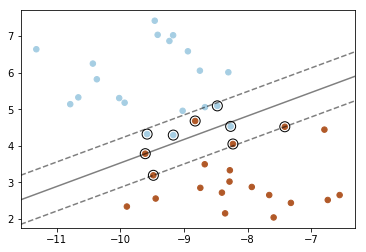

In [6]:
plot_hyperplane(svm.SVC(kernel='linear', C=1), blob_X, blob_y)

#### Apply SVM with a Polynomial Kernel to some data

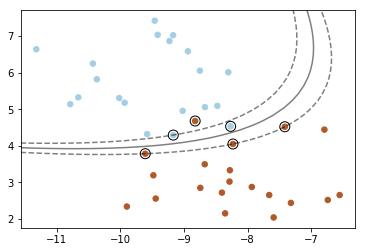

In [7]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=1), blob_X, blob_y)

#### Apply SVM with a Radial Basis Function Kernel to some data

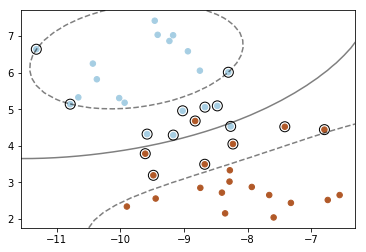

In [8]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=0.1, C=1), blob_X, blob_y)

# Question 1 --- Kernels!

Describe the term *kernel* in the context of Support Vector Machines.  Explain the polynomial kernel, and the Radial Basis function kernel.  

## Q1 Answer

Put your answer here!  Keep it fairly brief, and limit to one notebook cell.  The question is intended to get you to do some reading and thinking.

# Question 2 --- Exploring the balance between error and model complexity

Explore what happens to the three models (```linear```, ```poly```, ```rbf```) when you change ```C```.  Use ```C=1000``` and ```C=0.001``` **on the blob dataset.**  Your answer may depend on the dataset you are using (so if you change the ```random_state```, the behaviour may change).   

## Q2 Answer

Put your answer here!  You can add code cells (or copy them from above), and markdown cells to describe what's going on.  Use various settings and show various visualizations, using ```plot_hyperplane()``` or other Python scripts.

# Question 3 --- Polynomial Kernel Exploration
Explore the Polynomial kernel, by using the optional keyword parameter ```degree``` which is available in scikit, **on the blob dataset.**  Use a couple of different integers for the degree (in the range 2-5, to limit computation times), and explain what happens. You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

## Q3 Answer

Put your answer here!  You can add code cells and markdown cells to describe what's going on.  Use various settings and show various visualizations, using ```plot_hyperplane()``` or other Python scripts.  This doesn't need a very long answer.

# Question 4 --- RBF Kernel Exploration
Explore the Radial Basis Function kernel, by using the optional keyword parameter ```gamma```, **on the blob dataset.**  Try various extreme values for ```gamma```, and explain what happens.  You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

## Q4 Answer

Put your answer here!  You can add code cells and markdown cells to describe what's going on.  Use various settings and show various visualizations, using ```plot_hyperplane()``` or other Python scripts.  This doesn't need a very long answer.

# Question 5 --- Other synthetic datasets

Explore all three different kernels on the two other datasets above.  Choose a parameter setting for each kernel, including a value for ```C```, that seems to be lead to what you consider a good fit.  Explain briefly why you decided on the ```svm.SVC``` parameter settings that you chose.

## Q5 Answer

Put your answer here!  You can add code cells and markdown cells to describe what's going on.  Use various settings and show various visualizations, using ```plot_hyperplane()``` or other Python scripts.  

# Marking Scheme

1. 6 Marks **Kernels!** 
  * (2 marks) You description of the term *kernel* demonstrated understanding.
  * (2 marks) Your description of the polynomial kernel demonstrated understanding.
  * (2 marks) Your description of the Radial Basis function kernel demonstrated understanding. 


2.  6 Marks **Balance between error and model complexity**.
  * (2 marks) Your discussion on the behaviour of the ```linear``` kernel as ```C``` changes reflects an understanding of SVM.
  * (2 marks) Your discussion on the behaviour of the ```poly``` kernel as ```C``` changes reflects an understanding of SVM.
  * (2 marks) Your discussion on the behaviour of the ```rbf``` kernel as ```C``` changes reflects an understanding of SVM.


3.  3 marks **Explore the Polynomial kernel**
  * (3 marks) Your explanation of the behaviour of the polynomial kernel with different degrees reflects an understanding of SVM.


4. 3 marks **Explore the Radial Basis Function kernel** 
  * (3 marks) Your explanation of the behaviour of the Radial Basis Function kernel with different degrees reflects an understanding of SVM.


5. 6 marks **Other datasets** 
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```circ``` dataset created by ```make_circles```.
  * (3 marks) Your explanation for your choice of parameters for all three kernels reflects an understanding of the application of SVM to the ```moon``` dataset created by ```make_moons```.
        